# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Esercizi di laboratorio N.3

Ricordo la soluzione analitica delle equazioni di Black-Scholes per un moto browniano geometrico:

- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

$d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la cumulativa della Gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

I parametri in ingresso sono:
possono essere cambiati modificando il file "Parameters.dat" nel modo indicato dalla guida ("Guida.txt").

Vogliamo computare con un metodo Monte Carlo il prezzo di una Call-Option e Put-Option al tempo $t=0$,  $C[S(0),0]$ e $P[S(0),0]$.
Dalla soluzione analitica ricordata sopra possiamo calcolare direttamente i due prezzi richiesti. Usiamo il risultato per un confronto con il metodo MC.

Il prezzo al tempo $t$ partendo dal tempo $t_0=0$ è dato da
 $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
 dove $W(t)\sim\mathcal{N}(0,t)$.

In [1]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Eseguiamo ora la stima MC in due modi diversi: calcolando direttamente il prezzo al tempo finale e calcolandolo a step discreti. Il risultato deve essere statisticamente uguale nei due casi. Infatti, la soluzione per $S(t)$ è esatta a ogni tempo $t.

La linea rossa nei grafici sotto rappresenta il valore calcolato dalla soluzione analitica.

Prezzo iniziale= 100.0
Prezzo concordato al tempo T, K= 100.0
Tempo finale T= 1.0
Numero di simulazioni= 1000000.0
Nblocchi= 100.0


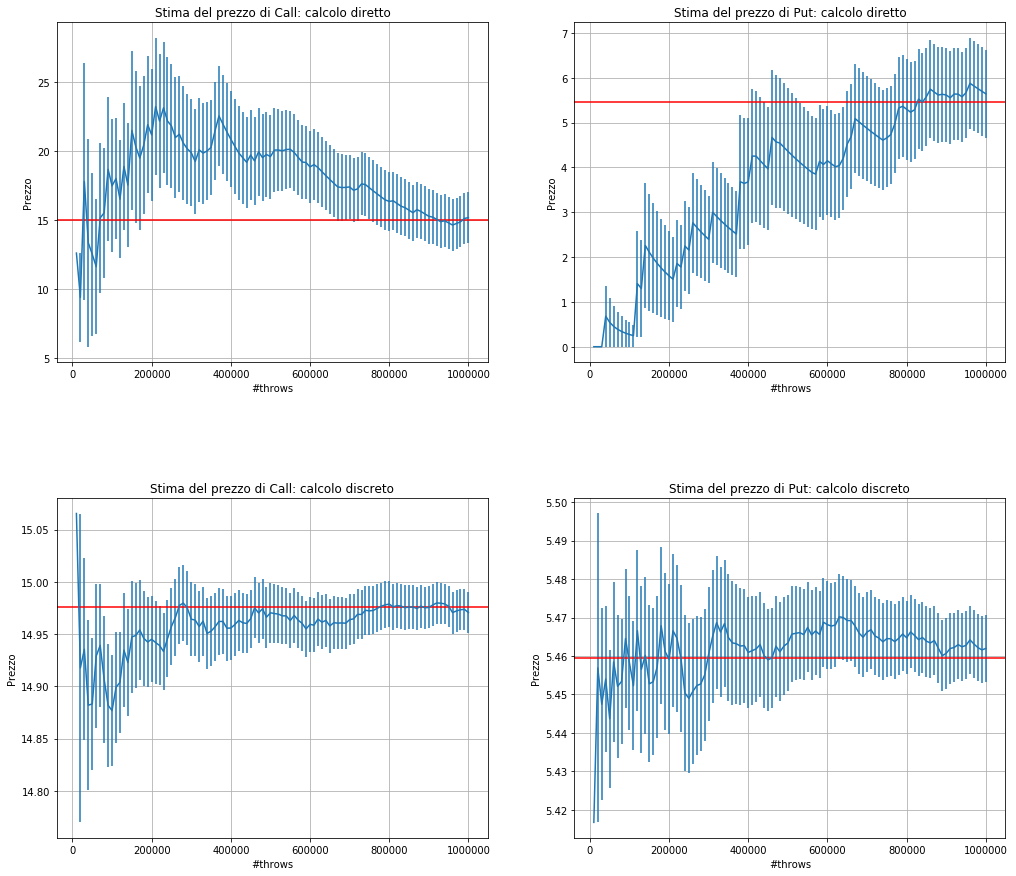

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

S_0, K, Sigma, T, r, simul, passi, Nblocchi = np.loadtxt("RisultatiNotebook/Parameters.dat") #tutti i parametri
L=int(simul/Nblocchi)  #Lunghezza blocchi

fig=plt.figure(figsize=(17,15))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
x, f, error=np.loadtxt("RisultatiNotebook/Risultati/DataDirettoC.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,f, yerr=error)
plt.title('Stima del prezzo di Call: calcolo diretto')
plt.xlabel('#throws')
plt.ylabel('Prezzo')
plt.axhline(y=call,color ='r')
plt.grid(True)

plt.subplot(2,2,2)
x, f, error=np.loadtxt("RisultatiNotebook/Risultati/DataDirettoP.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L
plt.errorbar(x,f,yerr=error)
plt.title('Stima del prezzo di Put: calcolo diretto')
plt.xlabel('#throws')
plt.ylabel('Prezzo')
plt.grid(True)
plt.axhline(y=put,color ='r')

plt.subplot(2,2,3)
x, f, error=np.loadtxt("RisultatiNotebook/Risultati/DataDiscretoC.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L
plt.errorbar(x,f,yerr=error)
plt.title('Stima del prezzo di Call: calcolo discreto')
plt.xlabel('#throws')
plt.ylabel('Prezzo')
plt.grid(True)
plt.axhline(y=call, color= 'r')

plt.subplot(2,2,4)
x, f, error=np.loadtxt("RisultatiNotebook/Risultati/DataDiscretoP.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
x*=L
plt.errorbar(x, f, yerr=error)
plt.title('Stima del prezzo di Put: calcolo discreto')
plt.xlabel('#throws')
plt.ylabel('Prezzo')
plt.grid(True)
plt.axhline(y=put, color='r')

print("Prezzo iniziale=",S_0)
print("Prezzo concordato al tempo T, K=",K)
print("Tempo finale T=",T)
print("Numero di simulazioni=",simul)
print("Nblocchi=", Nblocchi)

plt.show()